In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('zero_day_dataset.csv')
df.head()


Saving zero_day_dataset.csv to zero_day_dataset.csv


,CVE_Description,Exploit_Published
0,Buffer overflow in ABC software allows remote ...,1
1,Cross-site scripting vulnerability in web appl...,1
2,Information disclosure vulnerability in XYZ so...,0
3,Heap-based buffer overflow in DEF driver allow...,1
4,Denial of service vulnerability in GHI protoco...,0


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=50)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()


embeddings = []
for desc in df['CVE_Description']:
    embeddings.append(get_bert_embedding(desc))

X = pd.DataFrame(embeddings)
y = df['Exploit_Published']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

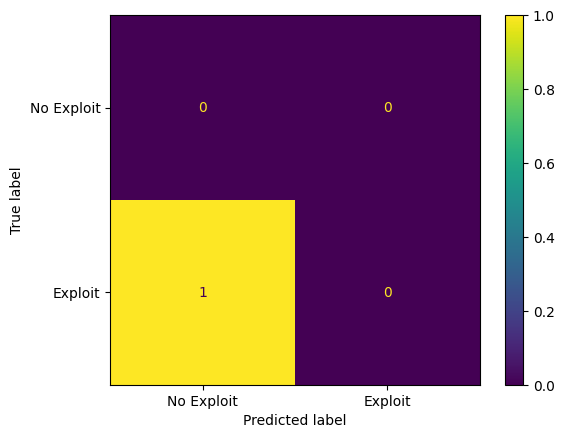

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Exploit','Exploit'])
disp.plot()


In [ ]:
def predict_zero_day(cve_desc):
    emb = get_bert_embedding(cve_desc)
    emb = scaler.transform([emb])
    pred = clf.predict_proba(emb)[0][1]
    print(f"Zero-Day Exploit Potential: {pred:.2f}")


predict_zero_day("Buffer overflow in ABC software allows remote attackers to execute arbitrary code")


Zero-Day Exploit Potential: 0.99
